In [1]:
import pandas as pd
import numpy as np


In [2]:
test=pd.read_csv(r"C:\Users\bisht\Downloads\archive (38)\Data_Test.csv",encoding='latin')
train=pd.read_csv(r"C:\Users\bisht\Downloads\archive (38)\Data_Train.csv",encoding='latin')

# Data Cleaning

In [3]:
##data cleaning

In [4]:
train

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ...",1
4,"In global markets, gold prices edged up today ...",3
...,...,...
7623,"Karnataka has been a Congress bastion, but it ...",0
7624,"The film, which also features Janhvi Kapoor, w...",2
7625,The database has been created after bringing t...,1
7626,"The state, which has had an uneasy relationshi...",0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STORY    7628 non-null   object
 1   SECTION  7628 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


In [6]:
train=train.rename(columns={'STORY':'NEWS','SECTION':'Type of News'})

In [7]:
train.isnull().sum()

NEWS            0
Type of News    0
dtype: int64

In [8]:
train.duplicated().sum()

77

In [9]:
df=train.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

# EDA

In [11]:
import seaborn as sns

<Axes: xlabel='Type of News', ylabel='count'>

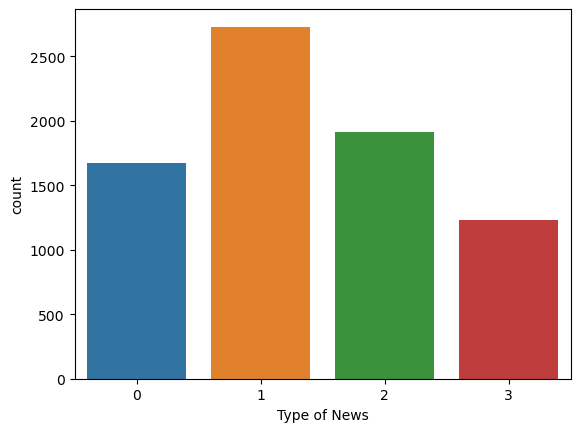

In [12]:
sns.countplot(x='Type of News',data=df)

In [13]:
df['Type of News'].value_counts()

1    2731
2    1914
0    1673
3    1233
Name: Type of News, dtype: int64

In [14]:
import nltk

In [15]:
df['num_char']=df['NEWS'].apply(len)

C:\Users\bisht\AppData\Local\Temp\ipykernel_20836\2979094117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']=df['NEWS'].apply(len)


In [16]:
df['num_words']=df['NEWS'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\bisht\AppData\Local\Temp\ipykernel_20836\255166415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['NEWS'].apply(lambda x:len(nltk.word_tokenize(x)))


In [17]:
df['num_sen']=df['NEWS'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\bisht\AppData\Local\Temp\ipykernel_20836\3182910975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sen']=df['NEWS'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [18]:
df

,NEWS,Type of News,num_char,num_words,num_sen
0,But the most painful was the huge reversal in ...,3,843,160,8
1,How formidable is the opposition alliance amon...,0,129,23,1
2,Most Asian currencies were trading lower today...,3,386,79,4
3,"If you want to answer any question, click on ...",1,587,115,8
4,"In global markets, gold prices edged up today ...",3,299,54,3
...,...,...,...,...,...
7623,"Karnataka has been a Congress bastion, but it ...",0,394,71,2
7624,"The film, which also features Janhvi Kapoor, w...",2,136,26,1
7625,The database has been created after bringing t...,1,484,85,2
7626,"The state, which has had an uneasy relationshi...",0,1927,356,14


In [19]:
df.describe()

,Type of News,num_char,num_words,num_sen
count,7551.000000,7551.000000,7551.000000,7551.000000
mean,1.358496,653.719375,121.272547,4.475963
std,0.999904,522.283468,96.965049,4.496789
min,0.000000,100.000000,10.000000,1.000000
25%,1.000000,316.000000,59.000000,1.000000
50%,1.000000,537.000000,99.000000,3.000000
75%,2.000000,836.000000,156.000000,6.000000
max,3.000000,6015.000000,1163.000000,76.000000


In [20]:
df[df['Type of News']==0][['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,1673.000000,1673.000000,1673.000000
mean,892.587567,166.828452,6.565451
std,644.268056,121.567163,5.982385
min,101.000000,13.000000,1.000000
25%,510.000000,92.000000,3.000000
50%,762.000000,143.000000,5.000000
75%,1078.000000,201.000000,8.000000
max,5926.000000,1163.000000,76.000000


In [21]:
df[df['Type of News']==1][['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,2731.000000,2731.000000,2731.000000
mean,730.168436,134.115342,5.499451
std,535.417949,97.469482,4.388995
min,101.000000,10.000000,1.000000
25%,401.000000,72.000000,3.000000
50%,604.000000,112.000000,4.000000
75%,897.000000,165.000000,7.000000
max,6015.000000,1040.000000,45.000000


In [22]:
df[df['Type of News']==2][['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,1914.000000,1914.000000,1914.000000
mean,360.201672,66.858934,1.179728
std,313.591899,59.450005,0.743740
min,100.000000,14.000000,1.000000
25%,155.000000,29.000000,1.000000
50%,284.000000,53.000000,1.000000
75%,434.000000,81.000000,1.000000
max,3854.000000,768.000000,10.000000


In [23]:
df[df['Type of News']==3][['num_char','num_words','num_sen']].describe()

,num_char,num_words,num_sen
count,1233.000000,1233.000000,1233.000000
mean,615.912409,115.480941,4.490673
std,307.714064,56.616962,2.583373
min,103.000000,19.000000,1.000000
25%,376.000000,72.000000,3.000000
50%,577.000000,109.000000,4.000000
75%,817.000000,152.000000,6.000000
max,2155.000000,397.000000,23.000000


<Axes: xlabel='num_char', ylabel='Count'>

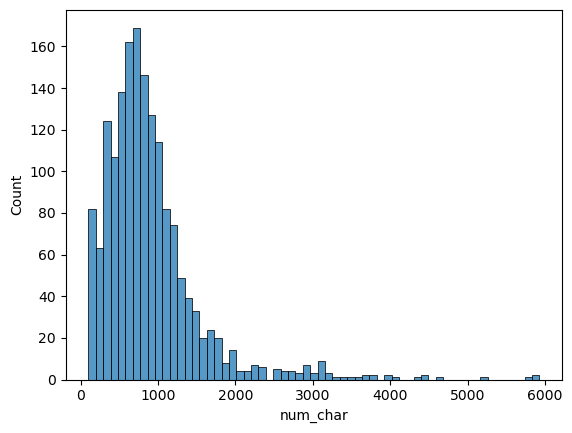

In [24]:
sns.histplot(df[df['Type of News']==0]['num_char'])


<Axes: xlabel='num_char', ylabel='Count'>

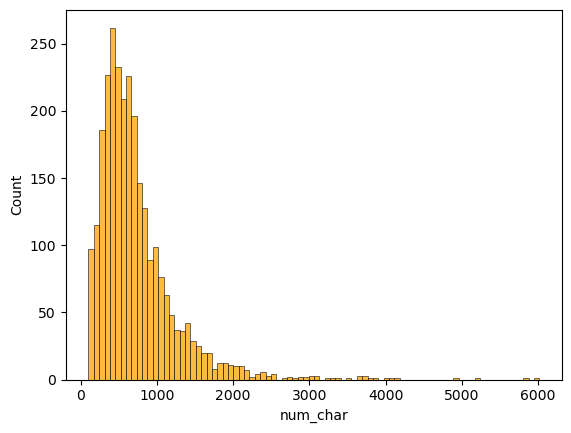

In [25]:
sns.histplot(df[df['Type of News']==1]['num_char'],color='orange')

<Axes: xlabel='num_char', ylabel='Count'>

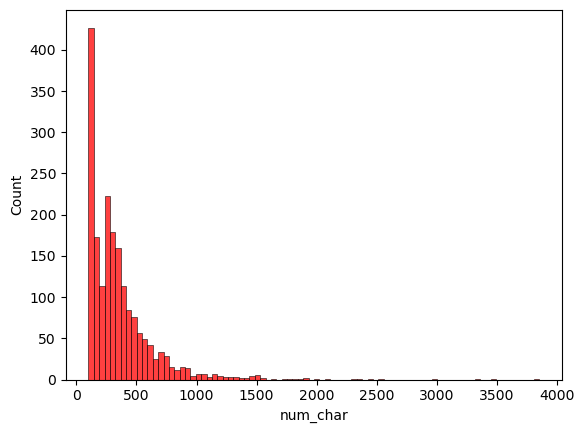

In [26]:
sns.histplot(df[df['Type of News']==2]['num_char'],color='red')

<Axes: xlabel='num_char', ylabel='Count'>

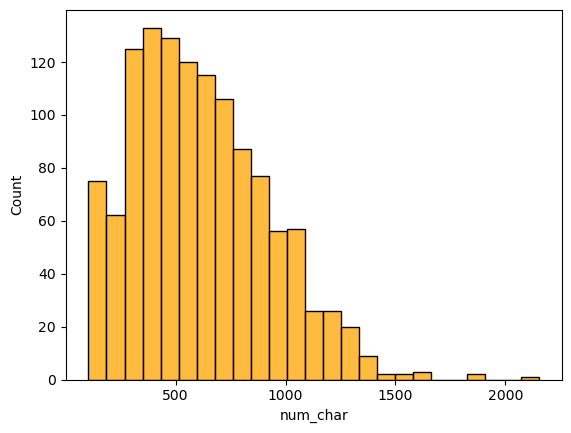

In [27]:
sns.histplot(df[df['Type of News']==3]['num_char'],color='orange')

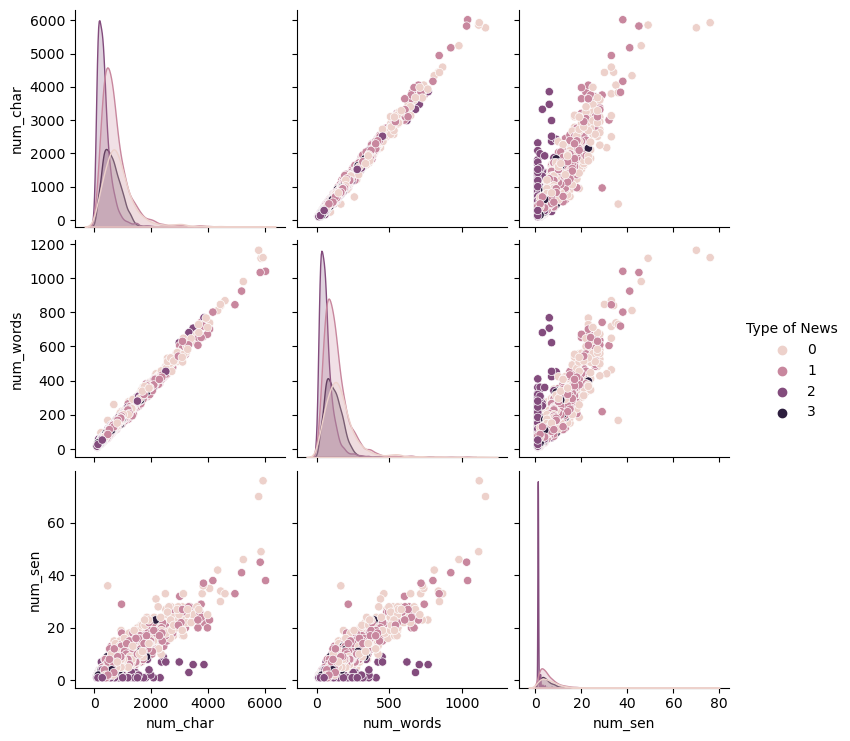

In [28]:
sns.pairplot(df,hue='Type of News')

C:\Users\bisht\AppData\Local\Temp\ipykernel_20836\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

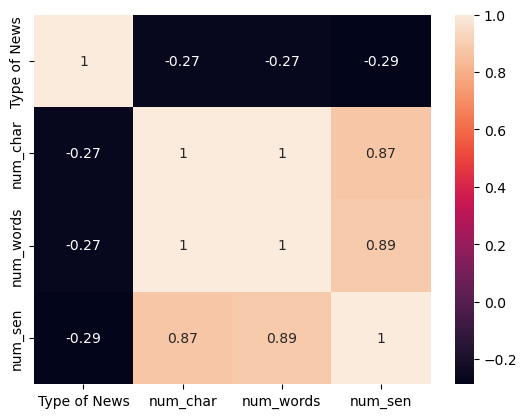

In [29]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [30]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [33]:
def preprocess_news(data):
    data=data.lower()
    data=nltk.word_tokenize(data)
    y= []
    
    for i in data:
        if i.isalnum():
            y.append(i)
    data= y[:]
    y.clear()
    for i in data:
        if i not in stopwords.words('english') and i not  in string.punctuation:
            y.append(i)
            
    data= y[:]
    y.clear()
    for i in data:
        
        y.append(ps.stem(i))
        
    return " ".join(y)

In [34]:
preprocess_news(df['NEWS'][0])

'pain huge revers fee incom unheard among privat sector lender essenti mean ye bank took grant fee structur loan deal paid account upfront book borrow turn default fee tie loan deal fell crack gill vow shift safer account practic amort fee incom rather book upfront move mend past way mean nasti surpris futur good news consid investor love clean imag loath uncertainti gain without pain promis strong stabl balanc sheet come sacrific well investor give hope phenomen growth promis made kapoor'

In [35]:
df['News_processed']=df['NEWS'].apply(preprocess_news)

C:\Users\bisht\AppData\Local\Temp\ipykernel_20836\3140743794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['News_processed']=df['NEWS'].apply(preprocess_news)


In [36]:
df.head()

,NEWS,Type of News,num_char,num_words,num_sen,News_processed
0,But the most painful was the huge reversal in ...,3,843,160,8,pain huge revers fee incom unheard among priva...
1,How formidable is the opposition alliance amon...,0,129,23,1,formid opposit allianc among congress jharkhan...
2,Most Asian currencies were trading lower today...,3,386,79,4,asian currenc trade lower today south korean c...
3,"If you want to answer any question, click on ...",1,587,115,8,want answer question click click answer also c...
4,"In global markets, gold prices edged up today ...",3,299,54,3,global market gold price edg today disappoint ...


# Wordcloud to check frequent words in different news

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [38]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [39]:
News1=wc.generate(df[df['Type of News']==0]['News_processed'].str.cat(sep=' '))

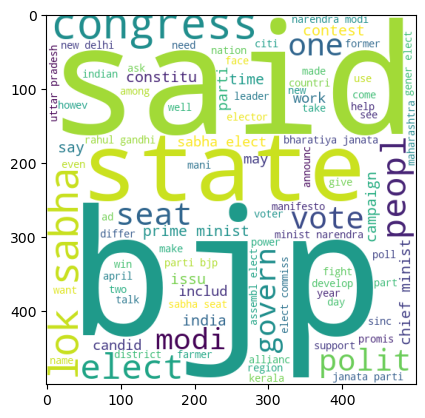

In [40]:
plt.imshow(News1)

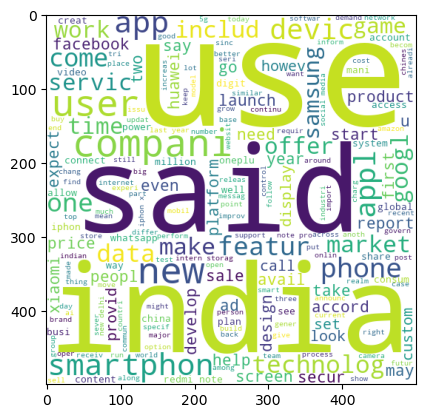

In [41]:
News2=wc.generate(df[df['Type of News']==1]['News_processed'].str.cat(sep=' '))
plt.imshow(News2)

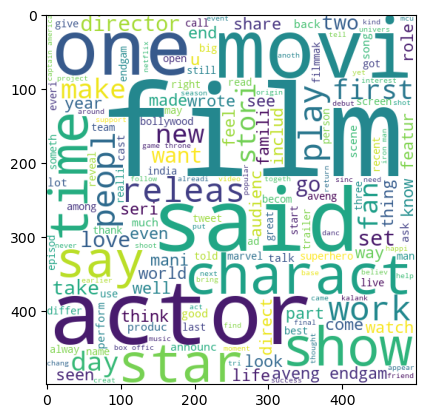

In [42]:
News3=wc.generate(df[df['Type of News']==2]['News_processed'].str.cat(sep=' '))
plt.imshow(News3)


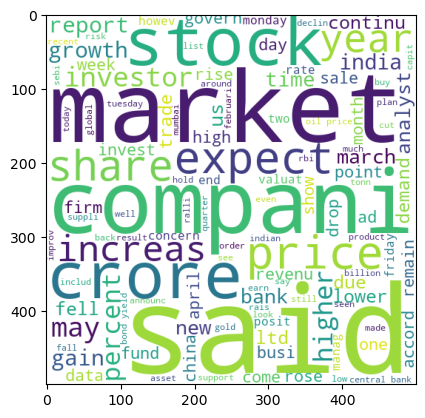

In [43]:
News4=wc.generate(df[df['Type of News']==3]['News_processed'].str.cat(sep=' '))
plt.imshow(News4)

In [44]:
news0_corpus=[]
for news in df[df['Type of News']==0]['News_processed'].tolist():
    for word in news.split():
        news0_corpus.append(word)

In [45]:
len(news0_corpus)

137037

In [46]:
news0_corpus

['formid',
 'opposit',
 'allianc',
 'among',
 'congress',
 'jharkhand',
 'mukti',
 'morcha',
 'jmm',
 'jharkhand',
 'vika',
 'morcha',
 'prajatantrik',
 'stori',
 'publish',
 'wire',
 'agenc',
 'feed',
 'without',
 'modif',
 'text',
 'headlin',
 'chang',
 'statement',
 'yeddyurappa',
 'say',
 'air',
 'strike',
 'would',
 'benefit',
 'bharatiya',
 'janata',
 'parti',
 'bjp',
 'bag',
 'around',
 '22',
 'parliamentari',
 'seat',
 'karnataka',
 'almost',
 'replenish',
 'pakistan',
 'arsen',
 'attack',
 'twist',
 'intent',
 'india',
 'carri',
 'air',
 'strike',
 'target',
 'terrorist',
 'train',
 'camp',
 'jem',
 'statement',
 'report',
 'context',
 'said',
 'favour',
 'say',
 'last',
 'coupl',
 'month',
 'first',
 'time',
 'said',
 'bjp',
 'karnataka',
 'win',
 'minimum',
 '22',
 'seat',
 'abl',
 'leadership',
 'modi',
 'ji',
 'yeddyurappa',
 'wrote',
 'twitter',
 'tri',
 'control',
 'damag',
 'statement',
 'wednesday',
 'caus',
 'two',
 'day',
 'reveal',
 'polit',
 'game',
 'behind',
 'se

In [47]:
from collections import Counter
news0=pd.DataFrame(Counter(news0_corpus).most_common(30),columns=['word','Number of times'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'parti'),
  Text(1, 0, 'bjp'),
  Text(2, 0, 'elect'),
  Text(3, 0, 'congress'),
  Text(4, 0, 'said'),
  Text(5, 0, 'seat'),
  Text(6, 0, 'state'),
  Text(7, 0, 'minist'),
  Text(8, 0, 'modi'),
  Text(9, 0, 'poll'),
  Text(10, 0, 'sabha'),
  Text(11, 0, 'lok'),
  Text(12, 0, 'polit'),
  Text(13, 0, 'vote'),
  Text(14, 0, 'govern'),
  Text(15, 0, 'also'),
  Text(16, 0, 'leader'),
  Text(17, 0, 'peopl'),
  Text(18, 0, 'chief'),
  Text(19, 0, 'candid'),
  Text(20, 0, 'india'),
  Text(21, 0, 'nation'),
  Text(22, 0, 'constitu'),
  Text(23, 0, 'allianc'),
  Text(24, 0, 'contest'),
  Text(25, 0, 'year'),
  Text(26, 0, 'gandhi'),
  Text(27, 0, 'one'),
  Text(28, 0, 'two'),
  Text(29, 0, 'time')])

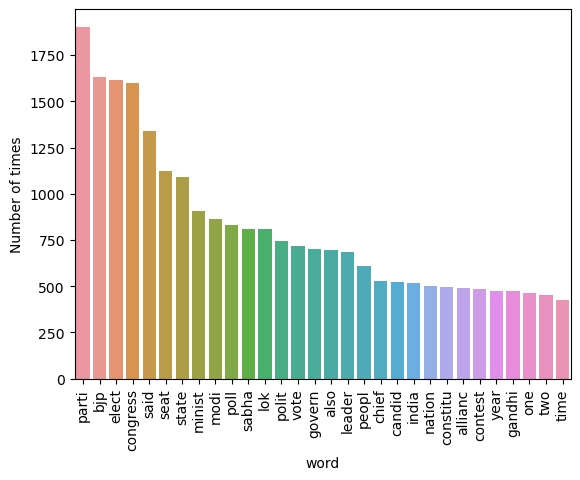

In [48]:
sns.barplot(x='word',y='Number of times',data=news0)
plt.xticks(rotation='vertical')

In [49]:
news1_corpus=[]
for news in df[df['Type of News']==1]['News_processed'].tolist():
    for word in news.split():
        news1_corpus.append(word)

In [50]:
from collections import Counter
news1=pd.DataFrame(Counter(news1_corpus).most_common(30),columns=['word','Number of times'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'smartphon'),
  Text(1, 0, 'also'),
  Text(2, 0, 'new'),
  Text(3, 0, 'user'),
  Text(4, 0, 'said'),
  Text(5, 0, 'use'),
  Text(6, 0, 'compani'),
  Text(7, 0, 'app'),
  Text(8, 0, 'india'),
  Text(9, 0, 'phone'),
  Text(10, 0, 'appl'),
  Text(11, 0, 'like'),
  Text(12, 0, 'year'),
  Text(13, 0, 'devic'),
  Text(14, 0, 'camera'),
  Text(15, 0, 'data'),
  Text(16, 0, 'featur'),
  Text(17, 0, 'one'),
  Text(18, 0, 'googl'),
  Text(19, 0, 'come'),
  Text(20, 0, 'market'),
  Text(21, 0, 'pro'),
  Text(22, 0, 'launch'),
  Text(23, 0, 'technolog'),
  Text(24, 0, 'iphon'),
  Text(25, 0, 'samsung'),
  Text(26, 0, 'price'),
  Text(27, 0, 'make'),
  Text(28, 0, 'display'),
  Text(29, 0, 'facebook')])

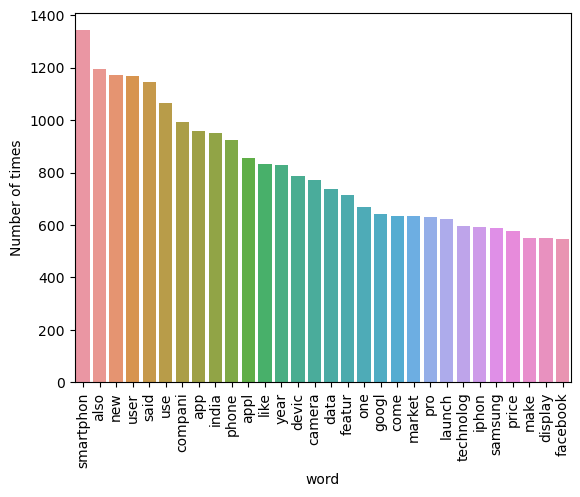

In [51]:
sns.barplot(x='word',y='Number of times',data=news1)
plt.xticks(rotation='vertical')

In [52]:
news2_corpus=[]
for news in df[df['Type of News']==2]['News_processed'].tolist():
    for word in news.split():
        news2_corpus.append(word)

In [53]:
from collections import Counter
news2=pd.DataFrame(Counter(news2_corpus).most_common(30),columns=['word','Number of times'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'film'),
  Text(1, 0, 'also'),
  Text(2, 0, 'actor'),
  Text(3, 0, 'said'),
  Text(4, 0, 'like'),
  Text(5, 0, 'movi'),
  Text(6, 0, 'one'),
  Text(7, 0, 'time'),
  Text(8, 0, 'show'),
  Text(9, 0, 'star'),
  Text(10, 0, 'aveng'),
  Text(11, 0, 'charact'),
  Text(12, 0, 'releas'),
  Text(13, 0, 'work'),
  Text(14, 0, 'first'),
  Text(15, 0, 'endgam'),
  Text(16, 0, 'would'),
  Text(17, 0, 'stori'),
  Text(18, 0, 'year'),
  Text(19, 0, 'say'),
  Text(20, 0, 'make'),
  Text(21, 0, 'play'),
  Text(22, 0, 'peopl'),
  Text(23, 0, 'go'),
  Text(24, 0, 'share'),
  Text(25, 0, 'love'),
  Text(26, 0, 'day'),
  Text(27, 0, 'get'),
  Text(28, 0, 'set'),
  Text(29, 0, 'director')])

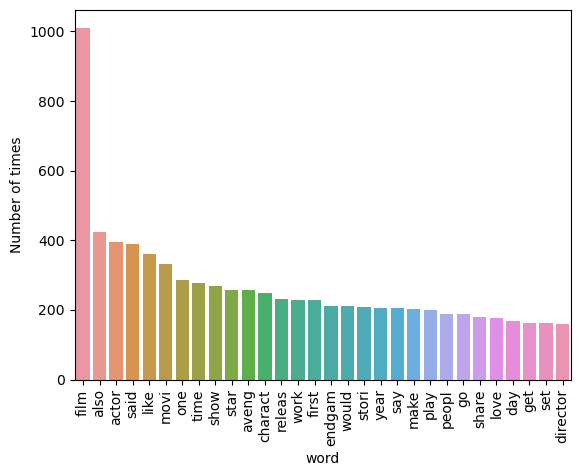

In [54]:
sns.barplot(x='word',y='Number of times',data=news2)
plt.xticks(rotation='vertical')

In [55]:
 df[df['Type of News']==2]['News_processed']

8       give audienc alreadi done yeh hai aashiqui pya...
9       com arbaaz khan spoke get back dabangg salman ...
18      choos hide cp colleagu move hous form sexual r...
21      star varun dhawan alia bhatt sonakshi sinha ad...
29      two releas year far milan talki raw actor look...
                              ...                        
7611    want kind movi felt done similar kind movi tol...
7612    1999 film mother receiv best foreign languag f...
7620    bollywood celebr took social media express sho...
7624    film also featur janhvi kapoor revolv around s...
7627    viru star kunchacko boban tovino thoma indraji...
Name: News_processed, Length: 1914, dtype: object

In [56]:
news3_corpus=[]
for news in df[df['Type of News']==3]['News_processed'].tolist():
    for word in news.split():
        news3_corpus.append(word)

In [57]:
from collections import Counter
news3=pd.DataFrame(Counter(news3_corpus).most_common(30),columns=['word','Number of times'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'film'),
  Text(1, 0, 'also'),
  Text(2, 0, 'actor'),
  Text(3, 0, 'said'),
  Text(4, 0, 'like'),
  Text(5, 0, 'movi'),
  Text(6, 0, 'one'),
  Text(7, 0, 'time'),
  Text(8, 0, 'show'),
  Text(9, 0, 'star'),
  Text(10, 0, 'aveng'),
  Text(11, 0, 'charact'),
  Text(12, 0, 'releas'),
  Text(13, 0, 'work'),
  Text(14, 0, 'first'),
  Text(15, 0, 'endgam'),
  Text(16, 0, 'would'),
  Text(17, 0, 'stori'),
  Text(18, 0, 'year'),
  Text(19, 0, 'say'),
  Text(20, 0, 'make'),
  Text(21, 0, 'play'),
  Text(22, 0, 'peopl'),
  Text(23, 0, 'go'),
  Text(24, 0, 'share'),
  Text(25, 0, 'love'),
  Text(26, 0, 'day'),
  Text(27, 0, 'get'),
  Text(28, 0, 'set'),
  Text(29, 0, 'director')])

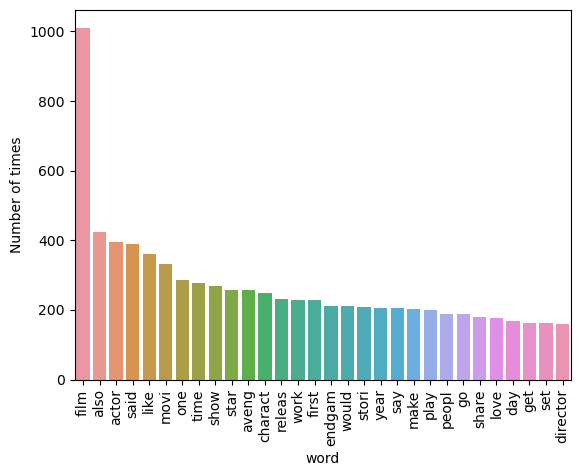

In [58]:
sns.barplot(x='word',y='Number of times',data=news2)
plt.xticks(rotation='vertical')

# Model building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()


In [60]:
X=cv.fit_transform(df['News_processed']).toarray()

In [61]:
from sklearn.model_selection import train_test_split

# Why use naive Bayes
- Text Data Suitability: Naive Bayes performs well on text data because it's designed to handle high-dimensional feature spaces (like bag-of-words representations).
- Low Risk of Overfitting: Due to its simplicity and strong assumptions, Naive Bayes tends to have low risk of overfitting the training data, making it robust even with noisy or sparse data.
- Effective for Small Datasets: Naive Bayes requires less training data compared to more complex algorithms like deep learning models. 

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
bnb=BernoulliNB(alpha=0.1,force_alpha='warn')
y=df[['Type of News']]


In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=52)

In [64]:
mnb=MultinomialNB()
y=df['Type of News']

In [65]:
mnb.fit(X_train,y_train)

C:\Users\bisht\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [66]:

y_pred=mnb.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix

0.9775132275132276


Text(50.722222222222214, 0.5, 'Actual Values')

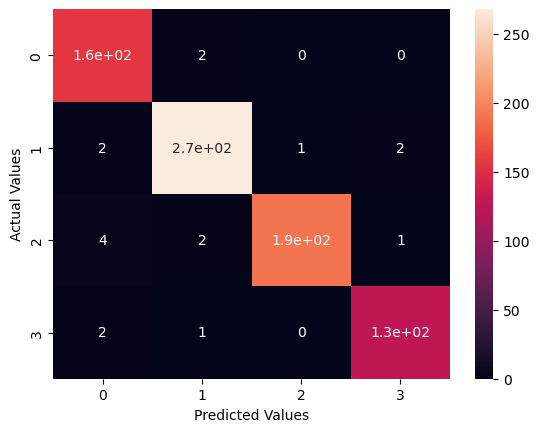

In [68]:
print(accuracy_score(y_test,y_pred))
cm_plot=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
cm_plot.set_xlabel('Predicted Values')
cm_plot.set_ylabel('Actual Values')

In [69]:
accuracy_score(y_pred,y_test)

0.9775132275132276

In [70]:
import pickle
    

In [72]:
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

(7551, 22134)